In [8]:
import json
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [74]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [70]:
file = open('dataset/vectorized_spacy20k.json','r')
data = json.load(file)
x_data = []
y_data = []
for i in data.keys():
    x_data.append(data[i][2])
    y_data.append(data[i][1])
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20)

In [94]:
regressor = RandomForestRegressor(n_estimators=220, random_state= 0, n_jobs=-1, max_depth=25)
regressor.fit(x_train,y_train)

RandomForestRegressor(max_depth=25, n_estimators=220, n_jobs=-1, random_state=0)

### Tried different combinations

spending 30 minutes is also not worth it

In [17]:
regressor = RandomForestRegressor()
param_grid = {
   'n_estimators': [100, 200, 500],
   # 'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6,8,9],
   'criterion' :['squared_error']
}
GSCV = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=10)
model = GSCV.fit(x_train, y_train)
# GSCV.best_params_ 

In [33]:
pred = model.predict(x_test)

NameError: name 'model' is not defined

In [19]:
mse = metrics.mean_absolute_error(y_test,pred)
print(mse)

0.16852292871487562


#### original result

In [95]:
y_pred = regressor.predict(x_test)

In [96]:
mse = metrics.mean_absolute_error(y_test,y_pred)
print(mse)

0.15919432285834015


In [90]:
r2_score = metrics.r2_score(y_test, y_pred)
print(r2_score)

0.3746270399421715


If n_estimators are more then mse will be less but it will take more time. for eg if n_estimator = 200 mse will be around 0.169 

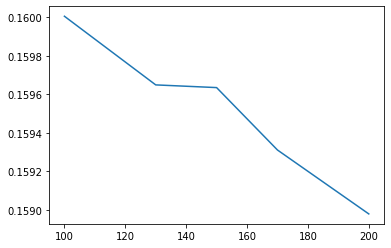

In [77]:
n_estimators = [100, 130, 150, 170, 200]
mse_score = []
for estimator in n_estimators:
   rf = RandomForestRegressor(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train,y_train)
   y_pred = rf.predict(x_test)
   mse = metrics.mean_absolute_error(y_test,y_pred)
   mse_score.append(mse)
plt.plot(n_estimators, mse_score)

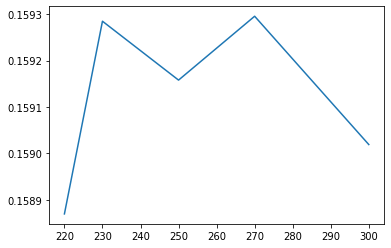

In [78]:
n_estimators = [220, 230, 250, 270, 300]
mse_score = []
for estimator in n_estimators:
   rf = RandomForestRegressor(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train,y_train)
   y_pred = rf.predict(x_test)
   mse = metrics.mean_absolute_error(y_test,y_pred)
   mse_score.append(mse)
plt.plot(n_estimators, mse_score)

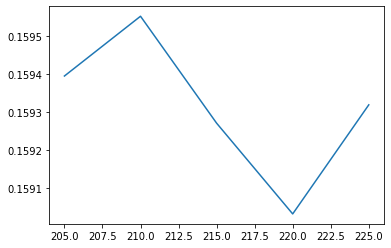

In [79]:
n_estimators = [205, 210, 215, 220, 225]
mse_score = []
for estimator in n_estimators:
   rf = RandomForestRegressor(n_estimators=estimator, n_jobs=-1)
   rf.fit(x_train,y_train)
   y_pred = rf.predict(x_test)
   mse = metrics.mean_absolute_error(y_test,y_pred)
   mse_score.append(mse)
plt.plot(n_estimators, mse_score)